Examen de certificación – Intento 2

### Instrucciones para examen

**Objetivo:** Este examen tiene como objetivo evaluar la capacidad del estudiante para limpiar, explorar, implementar y evaluar modelos de clasificación en un dataset de diabetes. Utilizaremos el «Diabetes Dataset» disponible en Kaggle. Los estudiantes deben demostrar habilidades prácticas en la manipulación de datos, creación de visualizaciones y modelado predictivo.

**Contexto y Descripción del Dataset**

El «Diabetes Dataset» contiene datos de salud de mujeres de ascendencia indígena Pima que viven cerca de Phoenix, Arizona, EE.UU. La tarea es predecir si un paciente tiene diabetes o no, basándose en ciertas medidas diagnósticas incluidas en el dataset.

**Diccionario de Datos:**

**Pregnancies:** Número de embarazos.

**Glucose:** Concentración de glucosa en plasma a las 2 horas en una prueba oral de tolerancia a la glucosa.

**BloodPressure:** Presión arterial diastólica (mm Hg).

**SkinThickness:** Espesor del pliegue cutáneo del tríceps (mm).

**Insulin:** Niveles séricos de insulina a las 2 horas (mu U/ml).

**BMI:** Índice de masa corporal (peso en kg / (altura en m)^2).

**DiabetesPedigreeFunction:** Función de pedigrí de diabetes.

**Age:** Edad (años).

**Outcome:** Variable objetivo (1: diabetes, 0: no diabetes).


**Requisitos**

**Limpieza de Datos:**

**Identificación y eliminación de valores duplicados:** Asegúrate de que no haya registros duplicados que puedan sesgar los resultados del análisis.

**Verificación y ajuste de tipos de datos:** Verifica que cada columna tenga el tipo de dato correcto (numérico o categórico) y ajusta si es necesario.

**Corrección de inconsistencias en valores categóricos:** Revisa las categorías de las variables y unifica aquellos valores que puedan estar escritos de diferentes maneras pero que representen lo mismo.

**Manejo de valores faltantes adecuadamente:** Identifica y maneja los valores faltantes utilizando técnicas apropiadas como la imputación de la mediana, media o moda, según corresponda.

**Exploración de Datos:**

**Visualizaciones univariadas y multivariadas:** Crea histogramas, gráficos de barras, diagramas de dispersión y mapas de calor para entender la distribución y las relaciones entre las variables.

**Estadísticas descriptivas:** Calcula medidas de tendencia central (media, mediana, moda) y de dispersión (rango, desviación estándar) para cada característica del dataset.


**Implementación de Modelos:**

**Modelos de Clasificación:** Implementa modelos de Random Forest y XGBoost.

**Evaluación de Modelos:** Evalúa los modelos utilizando métricas como accuracy, precision, recall, F1-score, y ROC-AUC.

**Comparación de Rendimiento:** Compara los resultados de ambos modelos y discute cuál es el más adecuado para este dataset.


**Entrega**

Los estudiantes deben entregar un archivo .ipynb comentado que incluya:

Proceso completo de limpieza y preprocesamiento de datos.

Visualizaciones y estadísticas descriptivas.

Implementación y evaluación de los modelos de clasificación.

Análisis comparativo del rendimiento de los modelos.

Además, el archivo debe subirse a GitHub con un tag de liberación (release tag) que permita identificar la entrega final.


Consideraciones Éticas y Tecnológicas

**Consideraciones Éticas:**

**Transparencia y Reproducibilidad:** Asegúrate de que todos los pasos del análisis sean claros y reproducibles. Otros investigadores deben poder seguir tus pasos y llegar a los mismos resultados.

**Imparcialidad y Sesgo: Re**visa si existen sesgos en los datos que puedan afectar la imparcialidad del modelo. Es importante que los modelos no discriminen injustamente entre diferentes grupos de datos.

**Consideraciones Tecnológicas:**

**Herramientas Utilizadas:** Utiliza herramientas estándar como Python, Jupyter Notebook, Pandas, Scikit-learn, Matplotlib y Seaborn.

**Escalabilidad:** Considera cómo las técnicas aplicadas podrían escalarse para manejar conjuntos de datos más grandes y complejos.

**Optimización de Modelos:** Aunque este examen no se enfoca en la optimización de hiperparámetros, se debe tener en cuenta para futuras implementaciones y mejorar el rendimiento de los modelos.

In [1]:
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
from sklearn.model_selection import train_test_split
from sklearn.preprocessing import StandardScaler
from sklearn.tree import DecisionTreeRegressor
from sklearn.model_selection import train_test_split
from sklearn.linear_model import LinearRegression
from sklearn.ensemble import RandomForestRegressor
from sklearn.metrics import mean_squared_error, r2_score
from sklearn.preprocessing import StandardScaler

In [3]:
df = pd.read_csv('../data/diabetes.csv')

# Exploración de datos
print("train")
print(df.info())
print(df.head())

train
<class 'pandas.core.frame.DataFrame'>
RangeIndex: 768 entries, 0 to 767
Data columns (total 9 columns):
 #   Column                    Non-Null Count  Dtype  
---  ------                    --------------  -----  
 0   Pregnancies               768 non-null    int64  
 1   Glucose                   768 non-null    int64  
 2   BloodPressure             768 non-null    int64  
 3   SkinThickness             768 non-null    int64  
 4   Insulin                   768 non-null    int64  
 5   BMI                       768 non-null    float64
 6   DiabetesPedigreeFunction  768 non-null    float64
 7   Age                       768 non-null    int64  
 8   Outcome                   768 non-null    int64  
dtypes: float64(2), int64(7)
memory usage: 54.1 KB
None
   Pregnancies  Glucose  BloodPressure  SkinThickness  Insulin   BMI  \
0            6      148             72             35        0  33.6   
1            1       85             66             29        0  26.6   
2            

In [4]:
print(f'El número de filas es: {df.shape[0]}')
print(f'El número de columnas es: {df.shape[1]}')

El número de filas es: 768
El número de columnas es: 9


**Identificación de valores nulos**

In [6]:
# Verificar valores nulos
print("Valores nulos en train:")
print(df.isnull().sum())

Valores nulos en train:
Pregnancies                 0
Glucose                     0
BloodPressure               0
SkinThickness               0
Insulin                     0
BMI                         0
DiabetesPedigreeFunction    0
Age                         0
Outcome                     0
dtype: int64


>**Observación**
> - Al observar se pudo evidenciar que  `no hay valores nulos`.

**Identificación y eliminación de valores duplicados**

In [7]:
# Verificar duplicados en el conjunto de entrenamiento
duplicates_df = df.duplicated().sum()  # Cuenta de duplicados en el conjunto de entrenamiento
print(f"Duplicados en el conjunto de entrenamiento: {duplicates_df}")

Duplicados en el conjunto de entrenamiento: 0


>**Observación**
> - Al observar se pudo evidenciar que  `no hay valores duplicados`.

**Verificación y ajuste de tipos de datos**

In [8]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 768 entries, 0 to 767
Data columns (total 9 columns):
 #   Column                    Non-Null Count  Dtype  
---  ------                    --------------  -----  
 0   Pregnancies               768 non-null    int64  
 1   Glucose                   768 non-null    int64  
 2   BloodPressure             768 non-null    int64  
 3   SkinThickness             768 non-null    int64  
 4   Insulin                   768 non-null    int64  
 5   BMI                       768 non-null    float64
 6   DiabetesPedigreeFunction  768 non-null    float64
 7   Age                       768 non-null    int64  
 8   Outcome                   768 non-null    int64  
dtypes: float64(2), int64(7)
memory usage: 54.1 KB


>**Observación**
> - Al poder observar a mas detalle el tipo de dato que tiene cada columna, se pudo ver que exiten datos de tipo `int` , `float`.
>- Al poder observar a mas detalle se tiene en cantidad de tipo de dato `float64(2)`, `int64(7)`

In [53]:
# Filtrar los valores fuera de los rangos razonables
invalid_bmi = df[df['BMI'] <= 10]  # Valor de BMI muy bajo, imposible en humanos
invalid_skin_thickness = df[df['SkinThickness'] == 0]

print(f"Filas con BMI fuera del rango razonable:\n{invalid_bmi}")
print(f"Filas con SkinThickness == 0:\n{invalid_skin_thickness}")

Filas con BMI fuera del rango razonable:
    Pregnancies  Glucose  BloodPressure  SkinThickness  Insulin  BMI  \
9             8      125             96              0        0  0.0   
49            7      105              0              0        0  0.0   
60            2       84              0              0        0  0.0   
81            2       74              0              0        0  0.0   
145           0      102             75             23        0  0.0   
371           0      118             64             23       89  0.0   
426           0       94              0              0        0  0.0   
494           3       80              0              0        0  0.0   
522           6      114              0              0        0  0.0   
684           5      136             82              0        0  0.0   
706          10      115              0              0        0  0.0   

     DiabetesPedigreeFunction Age Outcome  
9                       0.232  54       1  
49    

In [9]:
df['Pregnancies'].describe()

count    768.000000
mean       3.845052
std        3.369578
min        0.000000
25%        1.000000
50%        3.000000
75%        6.000000
max       17.000000
Name: Pregnancies, dtype: float64

In [10]:
df[df['Glucose'] <= 0]

,Pregnancies,Glucose,BloodPressure,SkinThickness,Insulin,BMI,DiabetesPedigreeFunction,Age,Outcome
75,1,0,48,20,0,24.7,0.140,22,0
182,1,0,74,20,23,27.7,0.299,21,0
342,1,0,68,35,0,32.0,0.389,22,0
349,5,0,80,32,0,41.0,0.346,37,1
502,6,0,68,41,0,39.0,0.727,41,1


In [11]:
df[df['BloodPressure'] <= 0]

,Pregnancies,Glucose,BloodPressure,SkinThickness,Insulin,BMI,DiabetesPedigreeFunction,Age,Outcome
7,10,115,0,0,0,35.3,0.134,29,0
15,7,100,0,0,0,30.0,0.484,32,1
49,7,105,0,0,0,0.0,0.305,24,0
60,2,84,0,0,0,0.0,0.304,21,0
78,0,131,0,0,0,43.2,0.270,26,1
81,2,74,0,0,0,0.0,0.102,22,0
172,2,87,0,23,0,28.9,0.773,25,0
193,11,135,0,0,0,52.3,0.578,40,1
222,7,119,0,0,0,25.2,0.209,37,0
261,3,141,0,0,0,30.0,0.761,27,1


In [12]:
df[df['SkinThickness'] <= 0]

,Pregnancies,Glucose,BloodPressure,SkinThickness,Insulin,BMI,DiabetesPedigreeFunction,Age,Outcome
2,8,183,64,0,0,23.3,0.672,32,1
5,5,116,74,0,0,25.6,0.201,30,0
7,10,115,0,0,0,35.3,0.134,29,0
9,8,125,96,0,0,0.0,0.232,54,1
10,4,110,92,0,0,37.6,0.191,30,0
...,...,...,...,...,...,...,...,...,...
757,0,123,72,0,0,36.3,0.258,52,1
758,1,106,76,0,0,37.5,0.197,26,0
759,6,190,92,0,0,35.5,0.278,66,1
762,9,89,62,0,0,22.5,0.142,33,0


In [13]:
df[df['Insulin'] <= 0]

,Pregnancies,Glucose,BloodPressure,SkinThickness,Insulin,BMI,DiabetesPedigreeFunction,Age,Outcome
0,6,148,72,35,0,33.6,0.627,50,1
1,1,85,66,29,0,26.6,0.351,31,0
2,8,183,64,0,0,23.3,0.672,32,1
5,5,116,74,0,0,25.6,0.201,30,0
7,10,115,0,0,0,35.3,0.134,29,0
...,...,...,...,...,...,...,...,...,...
761,9,170,74,31,0,44.0,0.403,43,1
762,9,89,62,0,0,22.5,0.142,33,0
764,2,122,70,27,0,36.8,0.340,27,0
766,1,126,60,0,0,30.1,0.349,47,1


In [14]:
df[df['BMI'] <= 0]

,Pregnancies,Glucose,BloodPressure,SkinThickness,Insulin,BMI,DiabetesPedigreeFunction,Age,Outcome
9,8,125,96,0,0,0.0,0.232,54,1
49,7,105,0,0,0,0.0,0.305,24,0
60,2,84,0,0,0,0.0,0.304,21,0
81,2,74,0,0,0,0.0,0.102,22,0
145,0,102,75,23,0,0.0,0.572,21,0
371,0,118,64,23,89,0.0,1.731,21,0
426,0,94,0,0,0,0.0,0.256,25,0
494,3,80,0,0,0,0.0,0.174,22,0
522,6,114,0,0,0,0.0,0.189,26,0
684,5,136,82,0,0,0.0,0.640,69,0


In [15]:
df[df['DiabetesPedigreeFunction'] < 0]

,Pregnancies,Glucose,BloodPressure,SkinThickness,Insulin,BMI,DiabetesPedigreeFunction,Age,Outcome


In [16]:
df[df['Age'] <= 0]

,Pregnancies,Glucose,BloodPressure,SkinThickness,Insulin,BMI,DiabetesPedigreeFunction,Age,Outcome


In [17]:
df['Outcome'].unique()

array([1, 0], dtype=int64)

In [18]:
print("Valores 0 en cada columna:")
print((df == 0).sum())

Valores 0 en cada columna:
Pregnancies                 111
Glucose                       5
BloodPressure                35
SkinThickness               227
Insulin                     374
BMI                          11
DiabetesPedigreeFunction      0
Age                           0
Outcome                     500
dtype: int64


In [19]:
df.describe()

,Pregnancies,Glucose,BloodPressure,SkinThickness,Insulin,BMI,DiabetesPedigreeFunction,Age,Outcome
count,768.000000,768.000000,768.000000,768.000000,768.000000,768.000000,768.000000,768.000000,768.000000
mean,3.845052,120.894531,69.105469,20.536458,79.799479,31.992578,0.471876,33.240885,0.348958
std,3.369578,31.972618,19.355807,15.952218,115.244002,7.884160,0.331329,11.760232,0.476951
min,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.078000,21.000000,0.000000
25%,1.000000,99.000000,62.000000,0.000000,0.000000,27.300000,0.243750,24.000000,0.000000
50%,3.000000,117.000000,72.000000,23.000000,30.500000,32.000000,0.372500,29.000000,0.000000
75%,6.000000,140.250000,80.000000,32.000000,127.250000,36.600000,0.626250,41.000000,1.000000
max,17.000000,199.000000,122.000000,99.000000,846.000000,67.100000,2.420000,81.000000,1.000000


In [20]:

# Convertir `Pregnancies` a tipo categórico (manteniendo los mismos valores)
df['Pregnancies'] = df['Pregnancies'].astype('category')

# Convertir `Age` a tipo categórico (manteniendo los mismos valores)
df['Age'] = df['Age'].astype('category')

# Convertir `Outcome` a tipo categórico (aunque ya es binario, lo confirmamos)
df['Outcome'] = df['Outcome'].astype('category')

# Verificar los cambios
print(df.dtypes)

# Ver los primeros registros para comprobar los cambios
print(df.head(10))


Pregnancies                 category
Glucose                        int64
BloodPressure                  int64
SkinThickness                  int64
Insulin                        int64
BMI                          float64
DiabetesPedigreeFunction     float64
Age                         category
Outcome                     category
dtype: object
  Pregnancies  Glucose  BloodPressure  SkinThickness  Insulin   BMI  \
0           6      148             72             35        0  33.6   
1           1       85             66             29        0  26.6   
2           8      183             64              0        0  23.3   
3           1       89             66             23       94  28.1   
4           0      137             40             35      168  43.1   
5           5      116             74              0        0  25.6   
6           3       78             50             32       88  31.0   
7          10      115              0              0        0  35.3   
8           2 

**Corrección de inconsistencias en valores categóricos:**

In [21]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 768 entries, 0 to 767
Data columns (total 9 columns):
 #   Column                    Non-Null Count  Dtype   
---  ------                    --------------  -----   
 0   Pregnancies               768 non-null    category
 1   Glucose                   768 non-null    int64   
 2   BloodPressure             768 non-null    int64   
 3   SkinThickness             768 non-null    int64   
 4   Insulin                   768 non-null    int64   
 5   BMI                       768 non-null    float64 
 6   DiabetesPedigreeFunction  768 non-null    float64 
 7   Age                       768 non-null    category
 8   Outcome                   768 non-null    category
dtypes: category(3), float64(2), int64(4)
memory usage: 41.6 KB


In [24]:
df['Pregnancies'].value_counts()

Pregnancies
1     135
0     111
2     103
3      75
4      68
5      57
6      50
7      45
8      38
9      28
10     24
11     11
13     10
12      9
14      2
15      1
17      1
Name: count, dtype: int64

In [ ]:
df['Age'].value_counts()

Age
22    72
21    63
25    48
24    46
23    38
28    35
26    33
27    32
29    29
31    24
41    22
30    21
37    19
42    18
33    17
38    16
36    16
32    16
45    15
34    14
40    13
43    13
46    13
39    12
35    10
52     8
44     8
50     8
51     8
58     7
54     6
47     6
53     5
60     5
49     5
57     5
48     5
66     4
62     4
63     4
55     4
59     3
56     3
65     3
67     3
61     2
69     2
64     1
68     1
70     1
72     1
81     1
Name: count, dtype: int64

In [26]:
df['Outcome'].value_counts()

Outcome
0    500
1    268
Name: count, dtype: int64

>**Observación**
> - No se visualiza datos de inconsistencia.

## **Exploración de Datos:**

**Visualizaciones univariadas y multivariadas:**

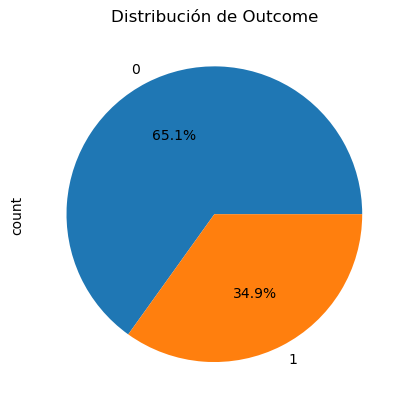

In [27]:
# Gráfico de pie para la variable 'Outcome'
df['Outcome'].value_counts().plot.pie(autopct='%1.1f%%')
plt.title('Distribución de Outcome')
plt.show()


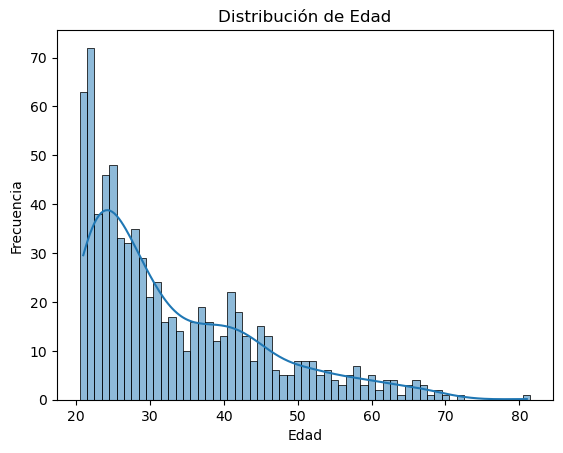

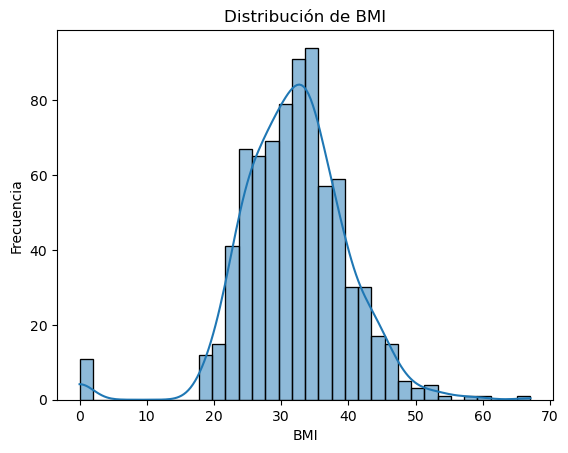

In [28]:
import seaborn as sns
import matplotlib.pyplot as plt

# Histograma de la variable 'Age'
sns.histplot(df['Age'], kde=True)
plt.title('Distribución de Edad')
plt.xlabel('Edad')
plt.ylabel('Frecuencia')
plt.show()

# Histograma de la variable 'BMI'
sns.histplot(df['BMI'], kde=True)
plt.title('Distribución de BMI')
plt.xlabel('BMI')
plt.ylabel('Frecuencia')
plt.show()


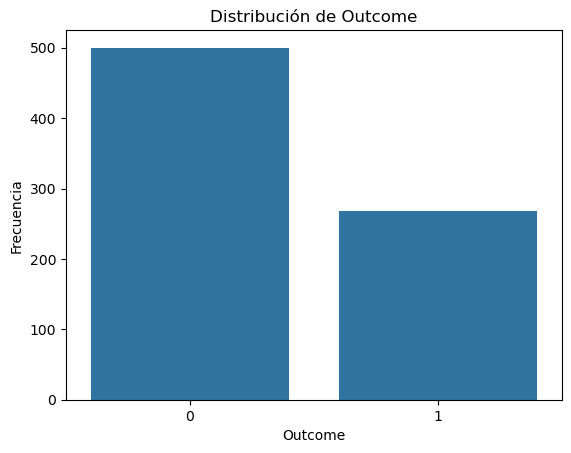

In [29]:
# Gráfico de barras de la variable 'Outcome'
sns.countplot(x='Outcome', data=df)
plt.title('Distribución de Outcome')
plt.xlabel('Outcome')
plt.ylabel('Frecuencia')
plt.show()


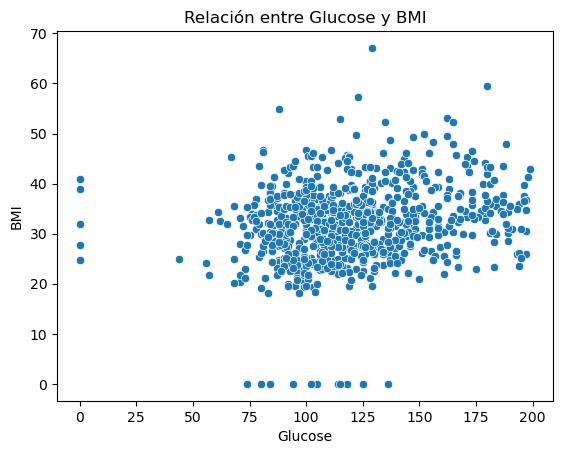

In [32]:
# Diagrama de dispersión entre 'Glucose' y 'BMI'
sns.scatterplot(x='Glucose', y='BMI', data=df)
plt.title('Relación entre Glucose y BMI')
plt.xlabel('Glucose')
plt.ylabel('BMI')
plt.show()




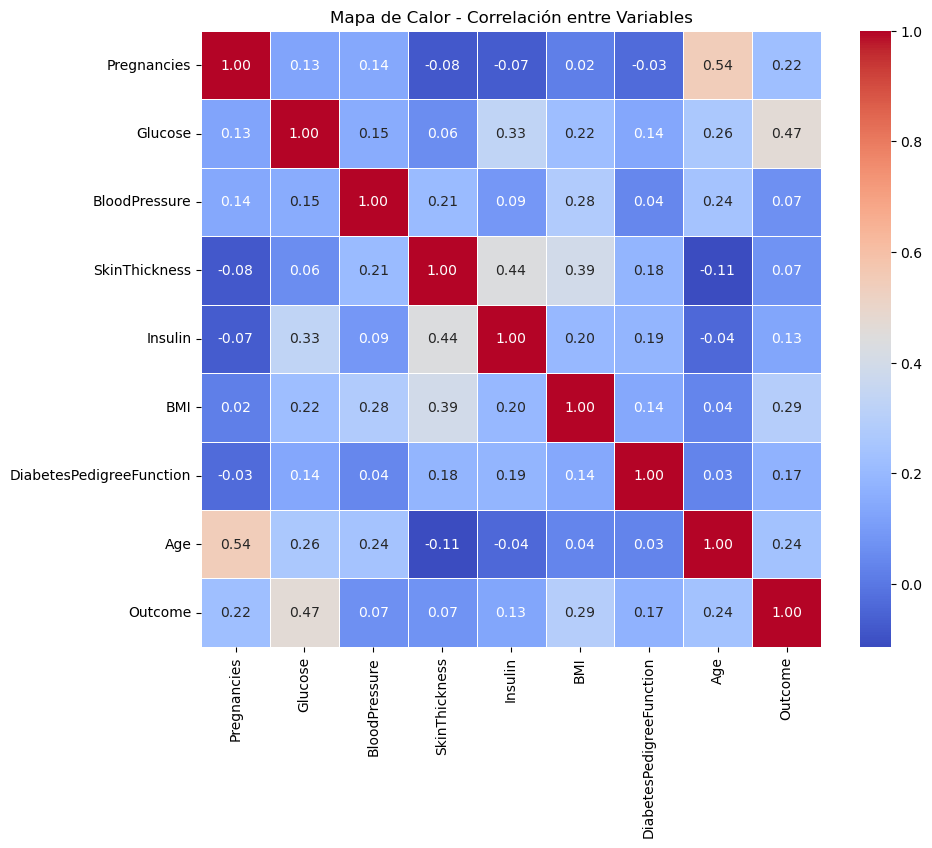

In [31]:
import seaborn as sns
import matplotlib.pyplot as plt

# Calcula la matriz de correlación
correlation_matrix = df.corr()

# Mapa de calor de la matriz de correlación
plt.figure(figsize=(10, 8))
sns.heatmap(correlation_matrix, annot=True, cmap='coolwarm', fmt='.2f', linewidths=0.5)
plt.title('Mapa de Calor - Correlación entre Variables')
plt.show()


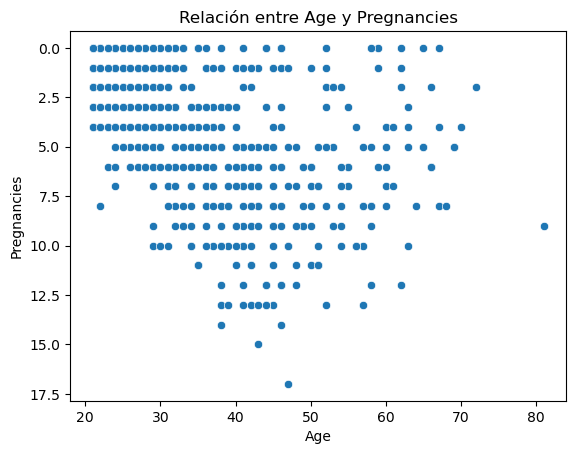

In [33]:
# Diagrama de dispersión entre 'Age' y 'Pregnancies'
sns.scatterplot(x='Age', y='Pregnancies', data=df)
plt.title('Relación entre Age y Pregnancies')
plt.xlabel('Age')
plt.ylabel('Pregnancies')
plt.show()

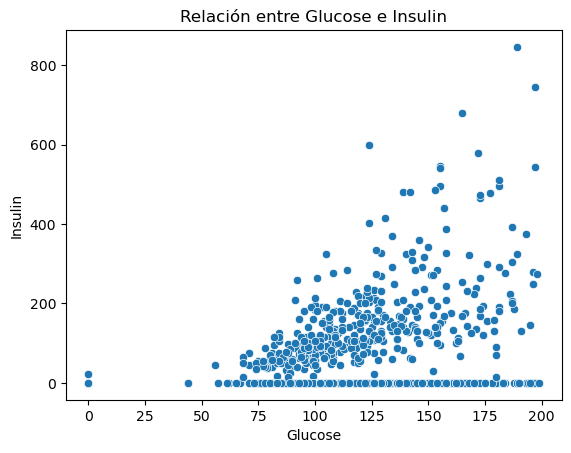

In [34]:
# Supongamos que 'Glucose' y 'Insulin' tienen una correlación alta
sns.scatterplot(x='Glucose', y='Insulin', data=df)
plt.title('Relación entre Glucose e Insulin')
plt.xlabel('Glucose')
plt.ylabel('Insulin')
plt.show()


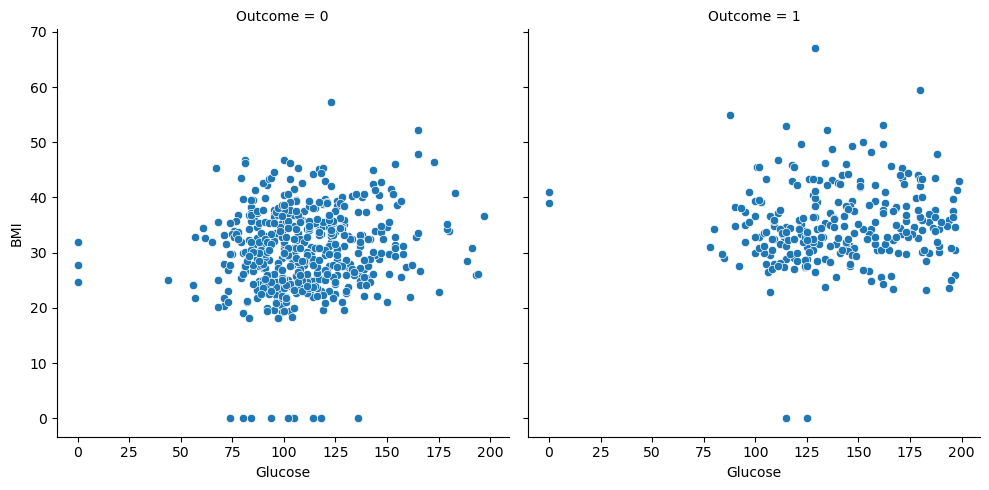

In [39]:
# Gráfico de dispersión entre 'Glucose' y 'BMI', dividido por 'Outcome'
g = sns.FacetGrid(df, col="Outcome", height=5)
g.map(sns.scatterplot, "Glucose", "BMI")
g.set_axis_labels('Glucose', 'BMI')
plt.show()




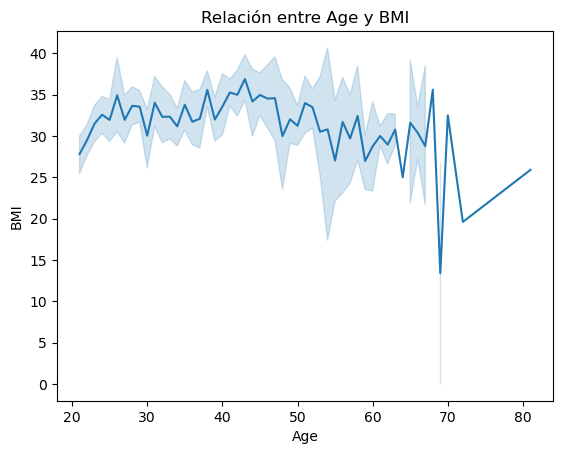

In [40]:
# Ejemplo de gráfico de líneas entre dos variables
sns.lineplot(x='Age', y='BMI', data=df)
plt.title('Relación entre Age y BMI')
plt.xlabel('Age')
plt.ylabel('BMI')
plt.show()


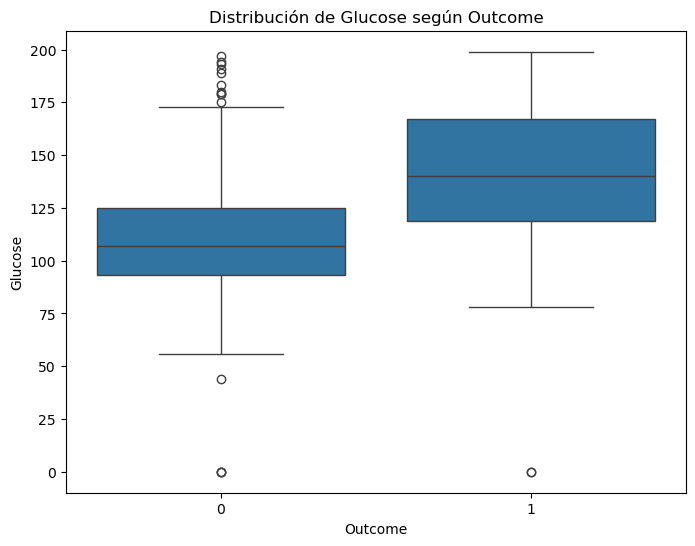

In [41]:
import seaborn as sns
import matplotlib.pyplot as plt

# Boxplot de 'Glucose' según 'Outcome'
plt.figure(figsize=(8, 6))
sns.boxplot(x='Outcome', y='Glucose', data=df)
plt.title('Distribución de Glucose según Outcome')
plt.xlabel('Outcome')
plt.ylabel('Glucose')
plt.show()


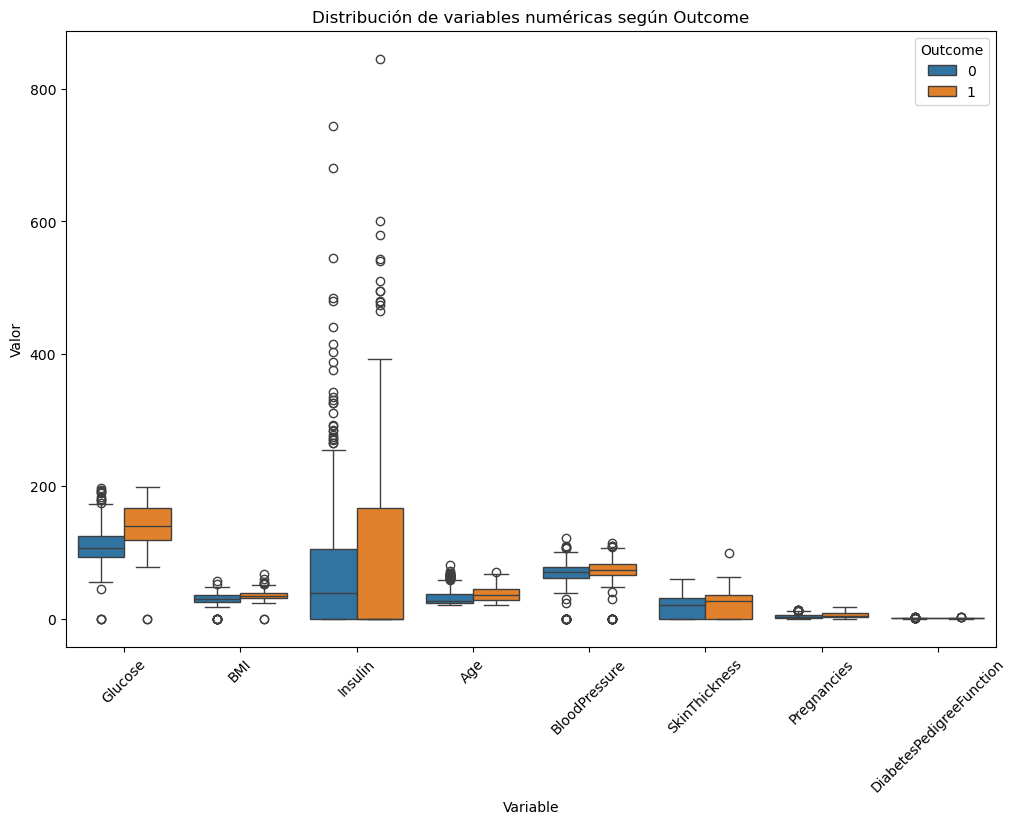

In [42]:
# Gráfico de cajas para múltiples variables
numerical_columns = ['Glucose', 'BMI', 'Insulin', 'Age', 'BloodPressure', 'SkinThickness', 'Pregnancies', 'DiabetesPedigreeFunction']
df_melted = df[numerical_columns + ['Outcome']].melt(id_vars='Outcome', value_vars=numerical_columns)

plt.figure(figsize=(12, 8))
sns.boxplot(x='variable', y='value', hue='Outcome', data=df_melted)
plt.title('Distribución de variables numéricas según Outcome')
plt.xlabel('Variable')
plt.ylabel('Valor')
plt.xticks(rotation=45)
plt.show()


**Estadísticas descriptivas:**

In [44]:
import pandas as pd

# Asegúrate de que no haya espacios extra en los nombres de las columnas
df.columns = df.columns.str.strip()

# Verifica que 'Outcome' sea de tipo categórico
df['Outcome'] = df['Outcome'].astype('category')

# Filtra solo las columnas numéricas
numerical_columns = df.select_dtypes(include=['number']).columns

# Crea un DataFrame para las estadísticas
estadisticas = pd.DataFrame()

# Medidas de tendencia central solo para las columnas numéricas
estadisticas['Media'] = df[numerical_columns].mean()
estadisticas['Mediana'] = df[numerical_columns].median()
estadisticas['Moda'] = df[numerical_columns].mode().iloc[0]  # La moda puede tener varios valores, tomamos el primero

# Imprimir el DataFrame con las estadísticas
print(estadisticas)



                               Media   Mediana    Moda
Glucose                   120.894531  117.0000  99.000
BloodPressure              69.105469   72.0000  70.000
SkinThickness              20.536458   23.0000   0.000
Insulin                    79.799479   30.5000   0.000
BMI                        31.992578   32.0000  32.000
DiabetesPedigreeFunction    0.471876    0.3725   0.254


In [45]:
df.describe()

,Glucose,BloodPressure,SkinThickness,Insulin,BMI,DiabetesPedigreeFunction
count,768.000000,768.000000,768.000000,768.000000,768.000000,768.000000
mean,120.894531,69.105469,20.536458,79.799479,31.992578,0.471876
std,31.972618,19.355807,15.952218,115.244002,7.884160,0.331329
min,0.000000,0.000000,0.000000,0.000000,0.000000,0.078000
25%,99.000000,62.000000,0.000000,0.000000,27.300000,0.243750
50%,117.000000,72.000000,23.000000,30.500000,32.000000,0.372500
75%,140.250000,80.000000,32.000000,127.250000,36.600000,0.626250
max,199.000000,122.000000,99.000000,846.000000,67.100000,2.420000


## **Implementación de Modelos:**

Accuracy: 0.72
Classification Report:
               precision    recall  f1-score   support

           0       0.79      0.78      0.78        99
           1       0.61      0.62      0.61        55

    accuracy                           0.72       154
   macro avg       0.70      0.70      0.70       154
weighted avg       0.72      0.72      0.72       154



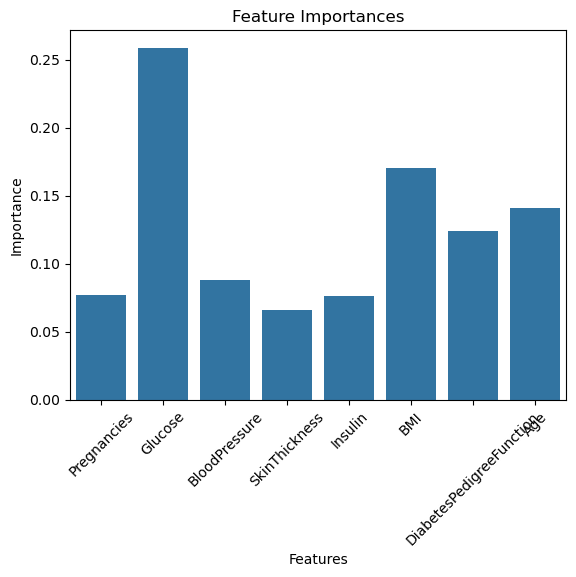

In [ ]:
import pandas as pd
from sklearn.model_selection import train_test_split
from sklearn.ensemble import RandomForestClassifier
from sklearn.metrics import accuracy_score, classification_report
import seaborn as sns
import matplotlib.pyplot as plt

# Preprocesar: Separar variables dependientes e independientes
X = df.drop('Outcome', axis=1)  # Variables independientes
y = df['Outcome']  # Variable dependiente

# Dividir el dataset en conjuntos de entrenamiento y prueba (80% entrenamiento, 20% prueba)
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)

# Crear el modelo Random Forest
model = RandomForestClassifier(n_estimators=100, random_state=42)

# Entrenar el modelo
model.fit(X_train, y_train)

# Hacer predicciones sobre el conjunto de prueba
y_pred = model.predict(X_test)

# Evaluar el rendimiento del modelo
accuracy = accuracy_score(y_test, y_pred)
print(f'Accuracy: {accuracy:.2f}')

# Imprimir el reporte de clasificación
print("Classification Report:\n", classification_report(y_test, y_pred))

# Visualizar la importancia de las características
feature_importances = model.feature_importances_
sns.barplot(x=X.columns, y=feature_importances)
plt.title('Feature Importances')
plt.xlabel('Features')
plt.ylabel('Importance')
plt.xticks(rotation=45)
plt.show()

Confusion Matrix:
 [[77 22]
 [21 34]]


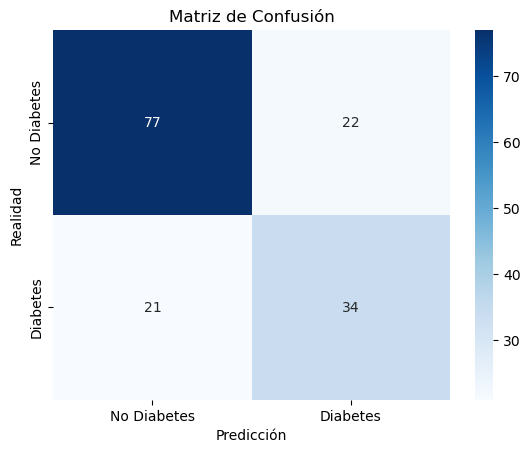

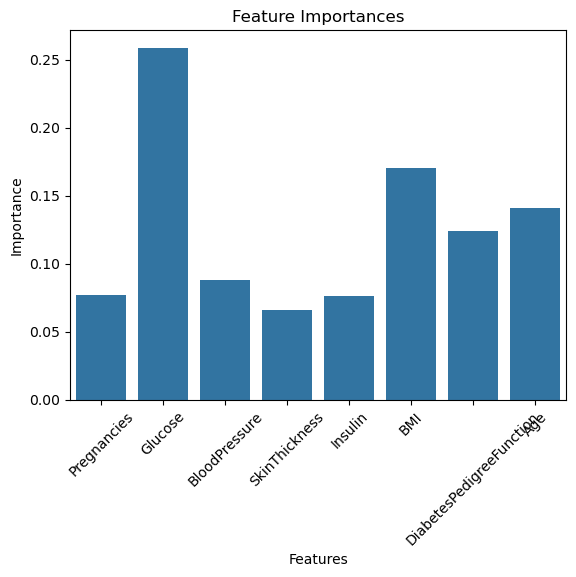

In [50]:
from sklearn.metrics import confusion_matrix

# Calcular la matriz de confusión
conf_matrix = confusion_matrix(y_test, y_pred)
print("Confusion Matrix:\n", conf_matrix)

# Visualizar la matriz de confusión
sns.heatmap(conf_matrix, annot=True, fmt='d', cmap='Blues', xticklabels=['No Diabetes', 'Diabetes'], yticklabels=['No Diabetes', 'Diabetes'])
plt.title('Matriz de Confusión')
plt.xlabel('Predicción')
plt.ylabel('Realidad')
plt.show()

# Visualizar la importancia de las características
feature_importances = model.feature_importances_
sns.barplot(x=X.columns, y=feature_importances)
plt.title('Feature Importances')
plt.xlabel('Features')
plt.ylabel('Importance')
plt.xticks(rotation=45)
plt.show()

In [52]:
import pandas as pd
import xgboost as xgb
from sklearn.model_selection import train_test_split
from sklearn.metrics import accuracy_score, confusion_matrix, classification_report

# Dividimos el dataset en características (X) y variable objetivo (y)
#X = df.drop('Outcome', axis=1)  # "Outcome" es la variable objetivo
#y = df['Outcome']

# Dividir el dataset en entrenamiento y prueba (80% para entrenamiento, 20% para prueba)
#X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)

# Crear el modelo XGBoost
model = xgb.XGBClassifier(
    objective='binary:logistic',   # Objetivo binario
    eval_metric='logloss',         # Métrica de evaluación
    use_label_encoder=False,       # Evitar la advertencia de uso de LabelEncoder
    random_state=42                # Para reproducibilidad
)

# Entrenar el modelo
model.fit(X_train, y_train)

# Realizar predicciones
y_pred = model.predict(X_test)

# Evaluar el modelo
accuracy = accuracy_score(y_test, y_pred)
print(f'Accuracy: {accuracy:.4f}')

# Matriz de confusión
print('Matriz de Confusión:')
print(confusion_matrix(y_test, y_pred))

# Reporte de clasificación
print('Reporte de Clasificación:')
print(classification_report(y_test, y_pred))



ValueError: DataFrame.dtypes for data must be int, float, bool or category. When categorical type is supplied, the experimental DMatrix parameter`enable_categorical` must be set to `True`.  Invalid columns:Pregnancies: category, Age: category